In [12]:
from statsmodels.tsa.api import SARIMAX
from pmdarima import auto_arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
apple_data=pd.read_csv(r"C:\Users\agnes\Documents\apziva_ai_residency\project5\data\appl_data.csv")


In [23]:

# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Assuming monthly seasonality
sarimax_model = SARIMAX(apple_data['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_model_fit = sarimax_model.fit()
print(sarimax_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1082
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2580.029
Date:                            Mon, 06 May 2024   AIC                           5170.057
Time:                                    20:15:11   BIC                           5194.930
Sample:                                         0   HQIC                          5179.480
                                           - 1082                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5595      0.472      1.186      0.235      -0.365       1.484
ma.L1         -0.5906      0.461   

In [25]:
df_close = apple_data['Close']
df_log = np.log(df_close)
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
start_index = len(train_data)
print(start_index)
end_index = len(train_data)+len(test_data)-1
print(end_index)
forecast = sarimax_model_fit.predict(start = start_index, end = end_index)
forecast.index = df_log.index[start_index : end_index+1]
print(len(forecast))
test_data.head()

970
1078
109


973    5.219274
974    5.233459
975    5.236495
976    5.245497
977    5.245391
Name: Close, dtype: float64

In [26]:
forecast.head()

970    182.164285
971    182.696084
972    182.060874
973    186.842183
974    184.664411
Name: predicted_mean, dtype: float64

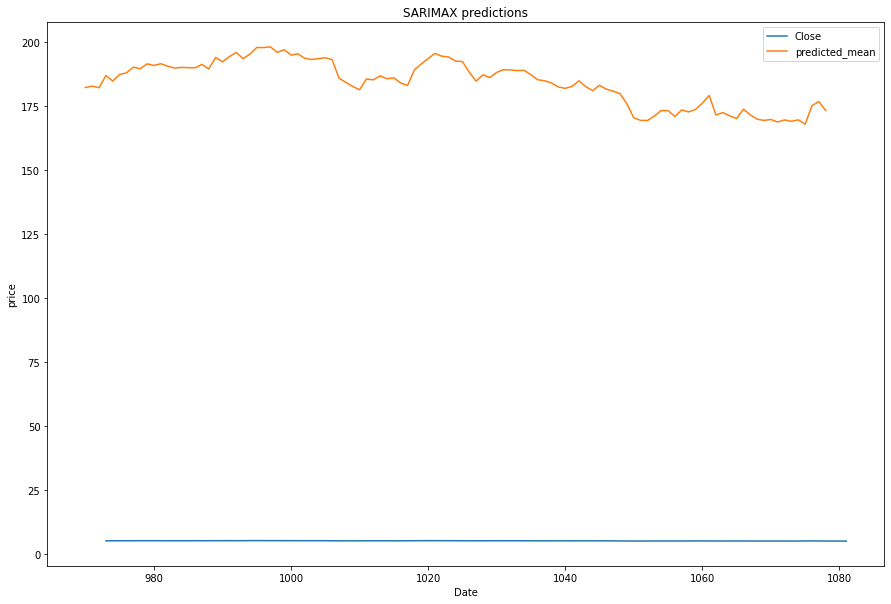

In [27]:
plt.figure(figsize=(15,10))
test_data.plot()
forecast.plot()
plt.xlabel('Date')
plt.ylabel('price')
plt.title('SARIMAX predictions')
plt.legend()
plt.show()